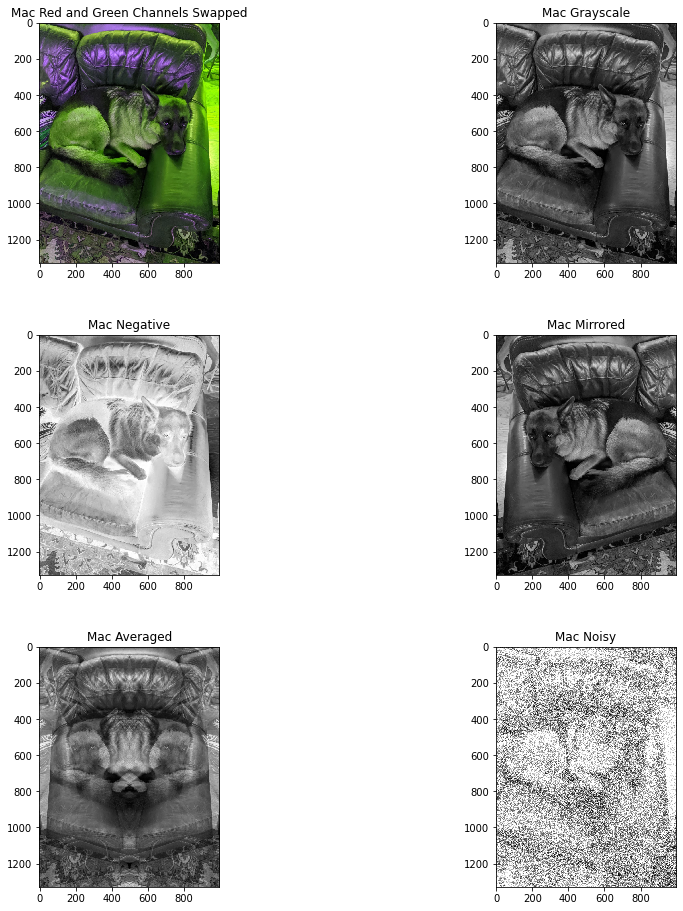

In [21]:
import os
import numpy as np
import imageio as im
from matplotlib import pyplot as plt
# from matplotlib import image as im

def rgb2gray(rgb):
  return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


figure, axs = plt.subplots(3, 2, figsize=(15,15))
figure.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)

image = np.asarray(im.imread('q4-input.png')).astype(np.uint8)

swapped = np.zeros(np.shape(image))
swapped[:,:,0] = image[:,:,1]
swapped[:,:,1] = image[:,:,0]
swapped[:,:,2] = image[:,:,2]
swapped = swapped.astype(np.uint8)
im.imsave('q4-output-swapped.png', swapped)
axs[0,0].set_title('Mac Red and Green Channels Swapped')
axs[0,0].imshow(swapped, interpolation = 'none')

grayscale = rgb2gray(image)
grayscale = grayscale.astype(np.uint8)
im.imsave('q4-output-grayscale.png', grayscale)
axs[0,1].set_title('Mac Grayscale')
axs[0,1].imshow(grayscale, cmap='gray', interpolation = 'none')

negative = 255 - grayscale
negative = negative.astype(np.uint8)
im.imsave('q4-output-negative.png', negative)
axs[1,0].set_title('Mac Negative')
axs[1,0].imshow(negative, cmap='gray', interpolation = 'none')

mirrored = grayscale[:, ::-1]
mirrored = mirrored.astype(np.uint8)
im.imsave('q4-output-mirror.png', mirrored)
axs[1,1].set_title('Mac Mirrored')
axs[1,1].imshow(mirrored, cmap='gray', interpolation = 'none')

# shouldnt be necessary but just in case
averaged = np.clip((rgb2gray(image) + mirrored) / 2, 0, 255)
averaged = averaged.astype(np.uint8)
im.imsave('q4-output-average.png', averaged)
axs[2,0].set_title('Mac Averaged')
axs[2,0].imshow(averaged, cmap='gray', interpolation = 'none')

noise = np.random.randint(0, 255, np.shape(grayscale))
np.save('q4-noise.npy', noise)
noisy_image = np.clip(rgb2gray(image) + noise, 0, 255)
noisy_image = noisy_image.astype(np.uint8)
im.imsave('q4-output-noise.png', noisy_image)
axs[2,1].set_title('Mac Noisy')
axs[2,1].imshow(noisy_image, cmap='gray', interpolation = 'none')

figure.savefig('plots.png')